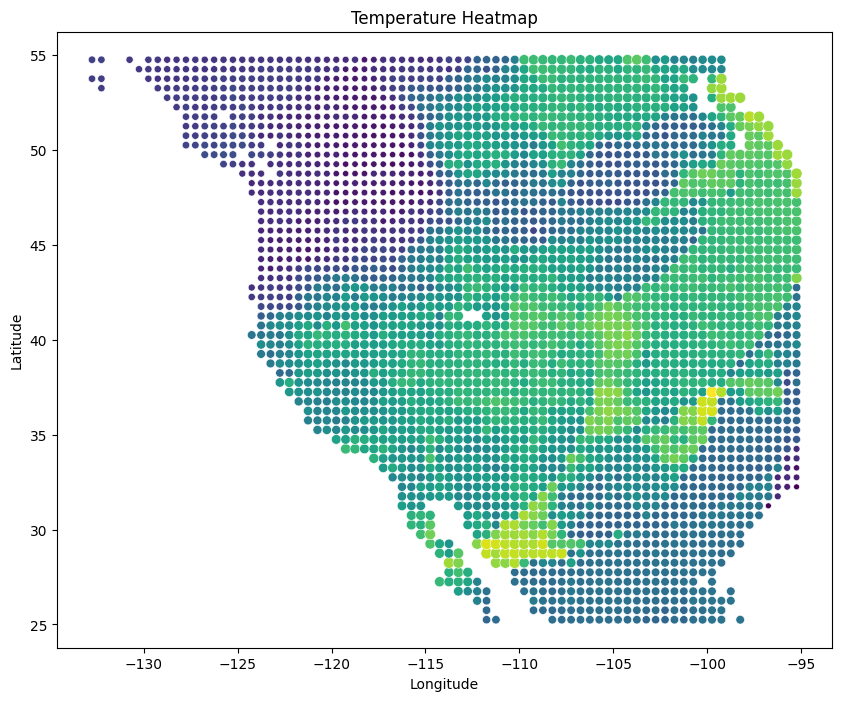

In [ ]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import seaborn as sns
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show
from rasterio.transform import xy
from time import process_time
import matplotlib.pyplot as plt
import geopandas as gpd
import shapely
import shapefile
from shapely.geometry import Polygon, Point, MultiPolygon


df=pd.read_excel('./datafiles/WNATA doi_10_5061_dryad_70rxwdc4v__v20240125/WNATA_JJATmax_3029gp_dataset.xlsx',header=[0,1])
df.set_index(df.columns[0],inplace=True)

n=0 #year number, n=0 correspond with 1553,

latitudes, longitudes = zip(*df.columns)
temperatures=list(df.iloc[n,:])  # List of corresponding temperatures)
data = pd.DataFrame({'latitude': latitudes, 'longitude': longitudes, 'temperature': temperatures})



# Set up the figure
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.scatterplot(x='longitude', y='latitude', size='temperature', hue='temperature', data=data, palette='viridis', legend=False)

# Add title and labels
plt.title('Temperature Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

125


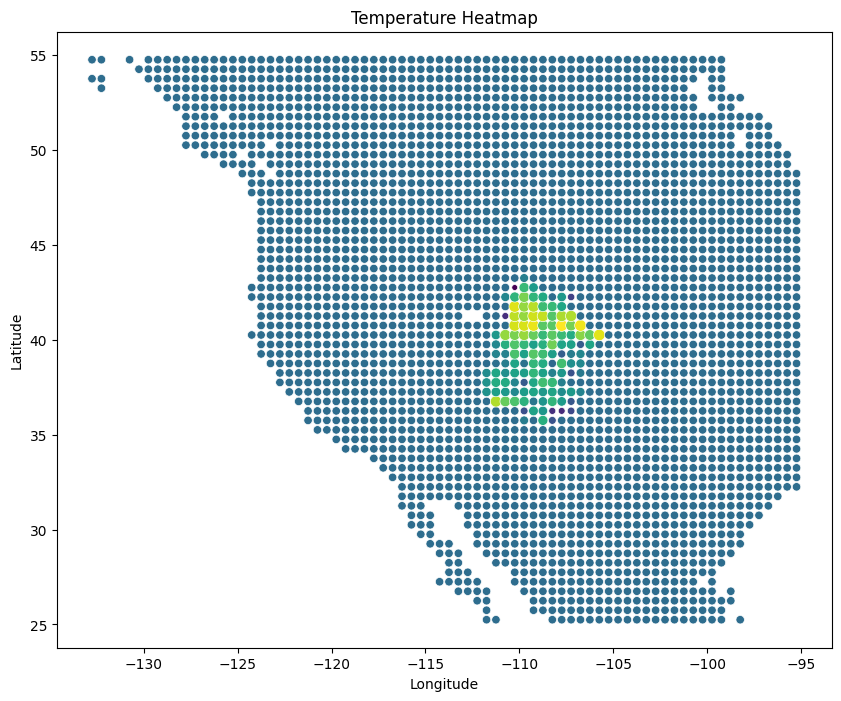

In [ ]:
polygon = shapefile.Reader('./datafiles/Upper_Colorado_River_Basin_Boundary/Upper_Colorado_River_Basin_Boundary.shp')
polygon = polygon.shapes()
for shape in polygon:
    shpfilePoints = shape.points
polygon = shpfilePoints
poly = Polygon(polygon)

for i in range(len(temperatures)):
    x=latitudes[i]
    y=longitudes[i]
    if not poly.contains(Point(y,x)): #longitude coordinate is on x axis, latitude is on y axis
        temperatures[i]=0
data = pd.DataFrame({'latitude': latitudes, 'longitude': longitudes, 'temperature': temperatures})

plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.scatterplot(x='longitude', y='latitude', size='temperature', hue='temperature', data=data, palette='viridis', legend=False)

# Add title and labels
plt.title('Temperature Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

In [1]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import seaborn as sns
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show
from rasterio.transform import xy
from time import process_time
import matplotlib.pyplot as plt
import geopandas as gpd
import shapely
import shapefile
from shapely.geometry import Polygon, Point, MultiPolygon


df=pd.read_excel('./datafiles/WNATA doi_10_5061_dryad_70rxwdc4v__v20240125/WNATA_JJATmax_3029gp_dataset.xlsx',header=[0,1])
df.set_index(df.columns[0],inplace=True)


with open('./datafiles/meandata.txt','r') as fp:
    meandata=[float(line.strip()) for line in fp]
with open('./datafiles/sddata.txt','r') as fp:
    sddata=[float(line.strip()) for line in fp]
for i,x in enumerate(df.columns):
    df[x]=df[x]*sddata[i]+meandata[i]



n=0 #years, n=0 corresponds to 1553
latitudes, longitudes = zip(*df.columns)



average_temperatures=[] #1553-2020

for t in range(df.shape[0]):
    avg_=[]
    temperatures=list(df.iloc[t,:])  # List of corresponding temperatures)
    # print(np.average(list(df.iloc[:,0])))

    polygon = shapefile.Reader('./datafiles/Upper_Colorado_River_Basin_Boundary/Upper_Colorado_River_Basin_Boundary.shp')
    polygon = polygon.shapes()
    for shape in polygon:
        shpfilePoints = shape.points
    polygon = shpfilePoints
    poly = Polygon(polygon)

    for i in range(len(temperatures)):
        x=latitudes[i]
        y=longitudes[i]
        if poly.contains(Point(y,x)):
            avg_.append(temperatures[i])

    average_temperatures.append(np.average(avg_))

with open('./datafiles/avg_ucrb_temp_patched.txt.','w') as f:
    for item in average_temperatures:
        f.write(f"{item}\n")